In [ ]:
# input a corpus and a document-term matrix 
# EDA summarize the main characteristics of data set, often using visual methods
# output figure out the main trends in data and if it makes sense, correlation, outlier
# 
# top words , most common words , already in columns , select column with largest value 
# vocabulary, unique number of words 
# amount of profanity , number of swear words used 
# aggregate and visualize , e.g. word cloud , or bar plot , scatter plot 
#
# data clean results can impact top words 
# insights, does data make sense, can we further clean data, what are initial findings 

# goal of eda - look at data and see if it makes sense
# explore and visualize data, extract insights 


EDA steps 
data: determine raw data format 
aggregate: 
visualize: 
insights: extract key takeaways
    
wordcloud: create word clouds
matplotlib: data visualizations 

In [3]:
# find most common words , read in document-term matrix 
# read in the document-term matrix , read in data frame 
import pandas as pd 
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()


,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
# find top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'ali': [('like', 128),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('right', 19),
  ('time', 19),
  ('got', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('theyre', 12)],
 'anthony': [('im', 60),
  ('like', 52),
  ('know', 39),
  ('dont', 38),
  ('joke', 35),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('grandma', 18),
  ('right', 18),
  ('thing', 17),
  ('think', 17),
  ('good', 17),
  ('time', 17),
  ('yeah', 16),
  ('jokes', 16),
  ('school', 16),
  ('did', 16),
  ('didnt', 15),
  ('baby', 15),
  ('okay', 15),
  ('ive', 15)],
 

In [9]:
# print the top 15 words said by each comedian 
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('----')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, gotta, wanna
----
anthony
im, like, know, dont, joke, got, said, thats, anthony, say, day, just, guys, people
----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
----
bo
know, like, love, think, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
----
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, love, got, shes, hasan
----
jim
like, im, dont, right, fucking, just, know, went, youre, people, thats, oh, day, going
----
joe
like, people, just, dont, im, fcking, fck, thats, gonna, theyre, know, youre, think, shit
----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, time, hey, got
----
louis
like, just, know, dont, thats, youre, im, life, people, thing, hes, gonna, cause, theres
----
mike
like, im, know, said, just, dont, th

In [11]:
# from above output, some words have very little meaning, can be added to stop words 
from collections import Counter 
# get first 30 top words 
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'gotta',
 'wanna',
 'husband',
 'right',
 'time',
 'got',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'yeah',
 'tell',
 'dude',
 'theyre',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'say',
 'day',
 'just',
 'guys',
 'people',
 'youre',
 'tell',
 'grandma',
 'right',
 'thing',
 'think',
 'good',
 'time',
 'yeah',
 'jokes',
 'school',
 'did',
 'didnt',
 'baby',
 'okay',
 'ive',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'fuck',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'theres',
 'let',
 'doing',
 'know',
 'like',
 'love',
 'think',
 'im',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'eye',
 'people',
 'sa

In [12]:
# aggregate use counter 
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 8),
 ('think', 8),
 ('gonna', 7),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('didnt', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fucking', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('fuck', 4),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('dude', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('shes', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('baby', 1),
 ('okay', 1),
 ('

In [13]:
# if more than half of the comedians have it as a top word, exclude it from list 
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
# list new stop words 
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'think',
 'gonna',
 'yeah',
 'said']

In [16]:
# let update document-term matrix with teh new list of stop words 
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer 

# read in cleaned data 
data_clean = pd.read_pickle('data_clean.pkl')
#add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#recreate document-term matrix 
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop_index = data_clean.index 

# pickle it for later use 
import pickle 
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [18]:
# now we can make word clouds , below steps must run 
# terminal (macos, linux)/ anaconda prompt (windows): 
# conda install -c conda-forge wordcloud 
# create wordcloud object
from wordcloud import WordCloud 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)



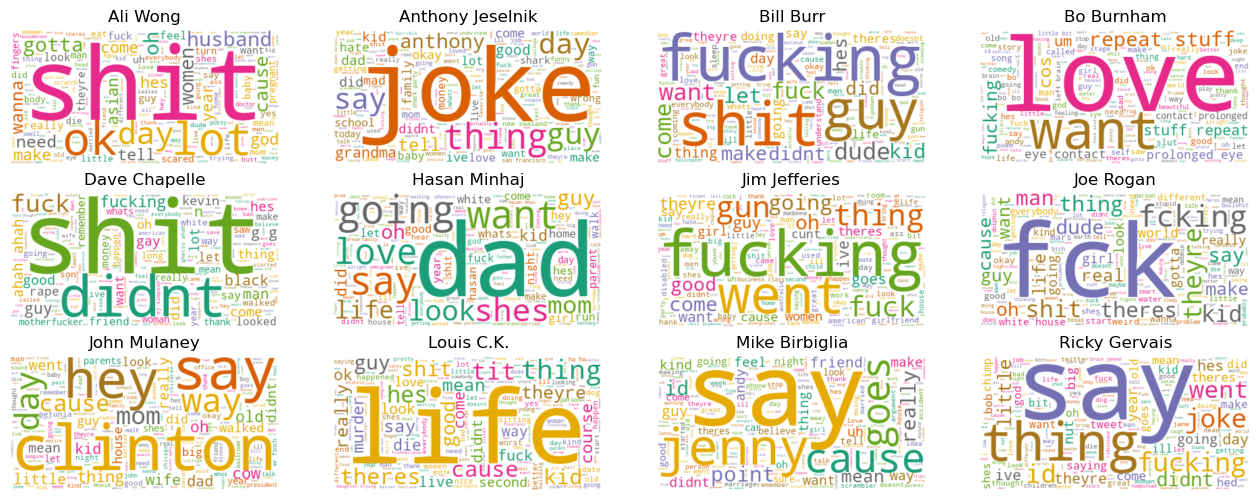

In [40]:
# reset output ddimensions and plot it
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [16, 6]
full_names = ['Ali Wong', 'Anthony Jeselnik','Bill Burr', 'Bo Burnham', 'Dave Chapelle', 'Hasan Minhaj',
            'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# create subplots for each comeddian 
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
plt.show()
# from result, there are a lot of swearing words 

findings
ali wong says the s-word a lot, guess that's funny
lot of people use the f-word, we dig into that later 

In [41]:
# analysis number of words used, how big a vacobulary is used 
# identify the non-zero items in the document-term matrix, meaning word showed at least once 
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size 
    unique_list.append(uniques)

# create a new dataframe that contains this unique word count 
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1041
9,Louis C.K.,1155
3,Bo Burnham,1325
6,Jim Jefferies,1362
0,Ali Wong,1391
4,Dave Chapelle,1433
8,John Mulaney,1452
7,Joe Rogan,1492
10,Mike Birbiglia,1544
5,Hasan Minhaj,1599


In [42]:
# calculate the words per minute of each comedian 
# find the total number of words that a comedian uses 
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# comedy special run times from IMDB, in mimutes 
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# let's add some columns to our dataframe 
data_words['total_words'] = total_list 
data_words['run_times'] = run_times 
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort 

# 2 interested columns , unique_words, words_per_minute (how slow/fast)


,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1041,3004,59,50.915254
3,Bo Burnham,1325,3250,60,54.166667
0,Ali Wong,1391,3368,60,56.133333
9,Louis C.K.,1155,3417,58,58.913793
4,Dave Chapelle,1433,4150,67,61.940299
6,Jim Jefferies,1362,4849,77,62.974026
10,Mike Birbiglia,1544,4826,76,63.500000
11,Ricky Gervais,1689,5058,79,64.025316
8,John Mulaney,1452,4104,62,66.193548
5,Hasan Minhaj,1599,4838,73,66.273973


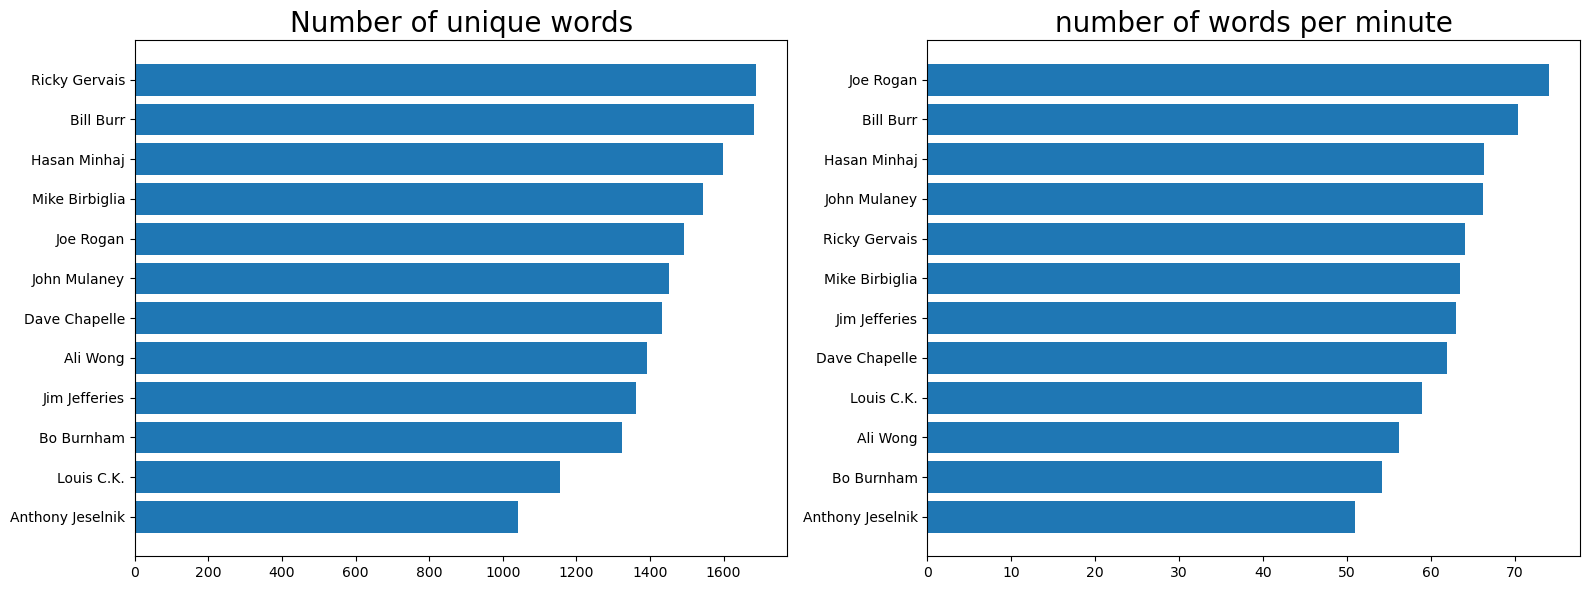

In [43]:
# visualize and plot findings 
import numpy as np 
y_pos = np.arange(len(data_words))
plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of unique words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('number of words per minute', fontsize=20)

plt.tight_layout()
plt.show()

In [47]:
# amount of profanity analysis
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 8),
 ('think', 8),
 ('gonna', 7),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('didnt', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fucking', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('fuck', 4),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('dude', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('shes', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('baby', 1),
 ('okay', 1),
 ('

In [51]:
# isolate bad words selected 
data_bad_words = data.transpose()[['fucking', 'fuck', 'fcking', 'fck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fcking + data_bad_words.fck , data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,107,64
bo,38,6
dave,65,46
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


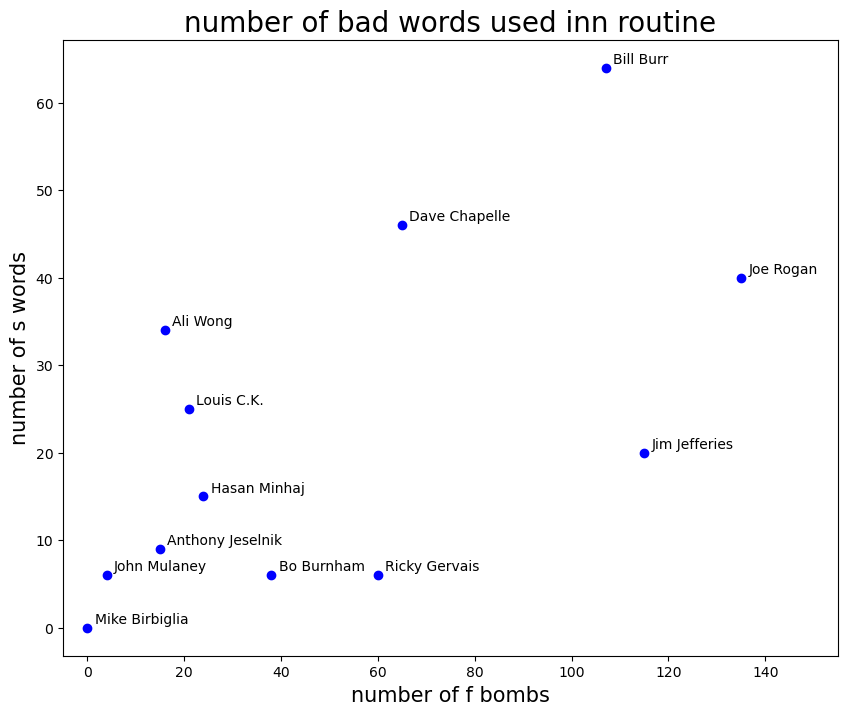

In [52]:
# create scatter plot of findigns 
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('number of bad words used inn routine', fontsize=20)
plt.xlabel('number of f bombs', fontsize=15)
plt.ylabel('number of s words', fontsize=15)
plt.show()

# from scatter plot, we can see below interesting stats
# joe uses f-words twice per minute
# mike uses 0 f/s-word 